# El tratamiendo de las variables categóricas

In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [29]:
df = pd.read_csv("../datasets/ecom-expense/Ecom Expense.csv")

In [30]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [31]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City")

In [32]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [33]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [34]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [35]:
df_new = df[column_names].join(dummy_gender)
df_new.head()
column_names = df_new.columns.values.tolist()

In [36]:
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [37]:
feature_cols = ["Monthly Income", "Transaction Time",
                "Gender_Female", "Gender_Male", "City_Tier 1",
                "City_Tier 2", "City_Tier 3", "Record"]

In [38]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [39]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
print(lm.intercept_)
print(lm.coef_)

-79.4171303013718
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [41]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.15494612549589634),
 ('Gender_Female', -131.02501325554624),
 ('Gender_Male', 131.02501325554607),
 ('City_Tier 1', 76.76432601049513),
 ('City_Tier 2', 55.1389743092325),
 ('City_Tier 3', -131.9033003197277),
 ('Record', 772.2334457445645)]

In [42]:
lm.score(X,Y)

0.9179923586131016

### El modelo puede ser escrito como:
Total_Spend = -79.4171303013718 + Monthly Income * 0.14753898049205738 + Transaction Time * 0.15494612549589634 + Gender_Female * -131.02501325554624 + Gender_Male * 131.02501325554607 + City_Tier 1 *  76.76432601049513 + City_Tier 2 * 55.1389743092325 + City_Tier 3 * -131.9033003197277 + Record * 772.2334457445645

* SI es hombre y vive en City Tier 1

In [43]:
df_new["prediction"] = (-79.4171303013718) + df_new["Monthly Income"] * 0.14753898049205738 + df_new["Transaction Time"] * 0.15494612549589634 + df_new["Gender_Female"] * (-131.02501325554624) + df_new["Gender_Male"] * 131.02501325554607 + df_new["City_Tier 1"] *  76.76432601049513 + df_new["City_Tier 2"] * 55.1389743092325 + df_new["City_Tier 3"] * (-131.9033003197277) + df_new["Record"] * 772.2334457445645

In [44]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [45]:
SSD = np.sum((df_new["prediction"]-df_new["Total Spend"])**2)

In [46]:
SSD

1517733985.340816

In [47]:
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))

In [48]:
RSE

803.1318809818165

In [49]:
sales_mean = np.mean(df_new["Total Spend"])

In [50]:
sales_mean

6163.176415976714

In [51]:
error = RSE / sales_mean

In [52]:
error*100

13.031135680294161

## Elminar variables dummy redundantes

In [53]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender").iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [54]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City").iloc[:,1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [55]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [56]:
feature_cols = ["Monthly Income","Transaction Time", "Gender_Male", "City_Tier 2", "City_Tier 3", "Record"]
X = df_new[feature_cols]
Y = df_new["Total Spend"]
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
print(lm.intercept_)

-133.67781754642238


In [58]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.1549461254959002),
 ('Gender_Male', 262.0500265110948),
 ('City_Tier 2', -21.62535170126276),
 ('City_Tier 3', -208.66762633022296),
 ('Record', 772.2334457445636)]

In [59]:
lm.score(X,Y)

0.9179923586131016

# Transformación de variables para conseguir una relación no lineal

In [60]:
import pandas as pd

In [61]:
data_auto = pd.read_csv("../datasets/auto/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [62]:
data_auto.shape

(406, 9)

In [63]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'CV vs MPG')

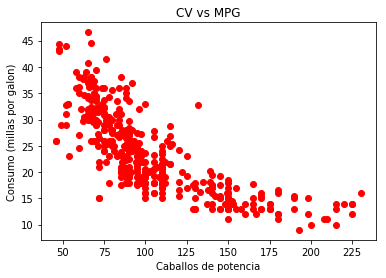

In [64]:
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Caballos de potencia")
plt.ylabel("Consumo (millas por galon)")
plt.title("CV vs MPG")

## Modelo de regresión lineal
* mpg = a + b * horsepower

In [65]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
X_data = X[:, np.newaxis]

In [66]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

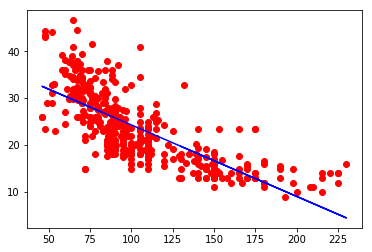

In [67]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X, lm.predict(X_data), color="blue")

In [68]:
lm.score(X_data, Y)

0.574653340645025

In [69]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/len(X_data)-1)
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error

(10315.75196006092, 4.940471238582748, 23.51457286432162, 0.21010252948625172)

## Modelo de regresión cuadratico
* mpg = a + b * horsepower ^ 2

In [70]:
X_data = X**2
X_data = X_data[:,np.newaxis]

In [71]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [72]:
lm.score(X_data, Y)

0.4849887034823205

In [73]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(12490.350340501926, 5.553410772769817, 23.51457286432162, 23.6168898529981)

## Modelo de regresión lineal y cuadratico
* mpg = a + b * horsepower + c * horsepower ^ 2

In [74]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [75]:
poly = PolynomialFeatures(degree=2)

In [76]:
X_data = poly.fit_transform(X[:,np.newaxis])

In [77]:
lm = linear_model.LinearRegression()
lm.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [78]:
lm.score(X_data, Y)

0.6439066584257469

In [79]:
lm.intercept_

55.02619244708036

In [80]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

mpg = 55.026 - 0.434 * hp + 0.00112615 * hp ^ 2

In [81]:
for d in range (1,6):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X[:,np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data,Y)
    print(lm.score(X_data, Y))

0.574653340645025
0.6439066584257469
0.6444678885560744
0.6467674189704502
0.6547512489366876


In [82]:
def regresion_validation(lm, X_data, Y):
    SSD = np.sum((Y - lm.predict(X_data))**2)
    RSE = np.sqrt(SSD/(len(X_data)-1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    print("SSD: "+ str(SSD)+", RSE: "+str(RSE)+", Y_mean: "+str(y_mean)+", error: "+str(error)+"%")

## El problema de los outliners

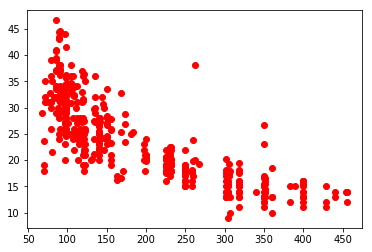

In [85]:
plt.plot(data_auto["displacement"], data_auto["mpg"], "ro")

In [87]:
X = data_auto["displacement"].fillna(data_auto["displacement"].mean())
X = X[:,np.newaxis]
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [89]:
lm.score(X,Y)

0.6261049762826918

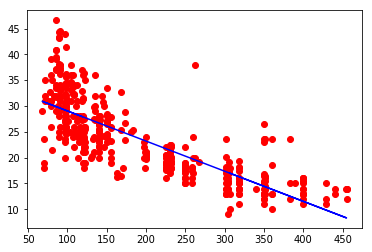

In [91]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X, lm.predict(X), color="blue")

In [93]:
data_auto[(data_auto["displacement"]>250)&(data_auto["mpg"] >35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [95]:
data_auto[(data_auto["displacement"]>300)&(data_auto["mpg"] >20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [102]:
data_auto_clean = data_auto.drop([395, 258, 305, 372])

In [103]:
X = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
X = X[:,np.newaxis]
Y = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [104]:
lm.score(X,Y)

0.6466514317531822

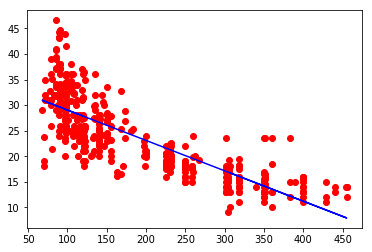

In [105]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X, lm.predict(X), color="blue")